# Signal-/Bildkomprimierung im jpeg mit der diskreten Kosinustransformation

## Einleitung
Datenkomprimierung findet in der digitalisierten Welt breite Anwendung. Daten werden komprimiert um den Speicherbedarf zu minimieren die Datenübertragung zu optimieren. Während einige Komprimierungsverfahren verlustfrei arbeiten, tretten bei anderen Verluste auf. Diese Verluste sind je nach Anwendung vernachlässigbar. Insbesondere bei der Speicherung von Medien wie Bildern, Videos und Musik, werden sind verlustbehaftete Komprimierungsverfahren heute Standard. Bei solchen Komprimierungsverfahren werden meist redundante Daten zusammengefasst und in einigen Fällen wird eine Reduktion des Detailierungsgrade in kauf genommen um weniger Speicherplatz zu belegen.

Vielen Komprimierungsverfahren liegt die sogennante diskrete Kosinustransformation zu Grunde. Diese wird vor allem im Bereich der Bild- und Videokompression breit angewendet. Dabei werden ausschliesslich Kosinusfunktionen unterschiedlicher Wellenzahl als Basisfunktion verwendet. [Burger. 2015. *Digitale Bildverarbeitung: eine algorithmische Einführung mit Java*](zotero://select/items/_9EUHGKD9). Sie ist dabei eine Sonderform der diskreten Fouriertransformation. Bekante Einsatzgebiete sind das JPEG Bildformat und MP3 Audiodateien, wobei bei letzterem eine etwas abgewandelte Form angewendet wird. Die diskrete Konsinustransformation kann dabei Eindimensional (für einfache Aufgaben) oder Mehrdimensional eingesetzt werden.  

## Theorieteil
Die Kosinustransformation basiert wie der Name schon sagt auf der Kosinusfunktion. Dabei werden festgelegten Stellen (Werten) in der Kosinuskurve Farbwerte zugewiesen. Der höchste Wert den die Kurve annehmen kann ist $1$ und der tiefste Wert $-1$. Diesen Werten können nun Farben zugeordnet werden. Die $1$ würde demnach dem Reinweiss entsprechen und die $-1$ einem reinen Schrwaz. Nun können Punkte auf der Kosinuskurve definiert werden, die einem bestimmten Grauton entsprechen. kann kann mann die Kosinusfunktion mit werten zwischen $0$ und $\pi$ darstellen. Nimmt man jetzt bestimmte Werte aus dieser Kurve bsp. $\frac{\pi}{6}$, $\frac{\pi}{2}$ und $\frac{5\pi}{6}$:

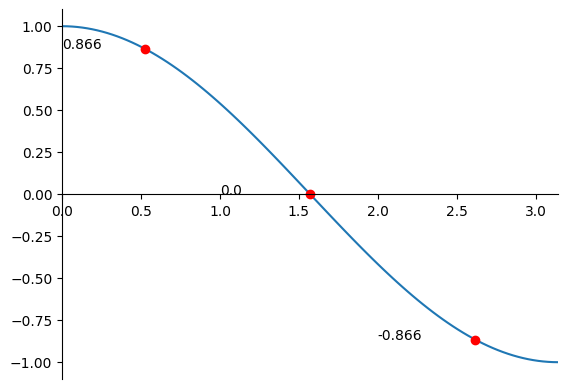

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

c_range = np.linspace(0, np.pi, 100)
y = np.cos(c_range)

values = np.array([np.cos(np.pi/6), np.cos(np.pi/2), np.cos(5*np.pi/6)])

fig, ax = plt.subplots()
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
plt.xlim(0, np.pi)
plt.plot(c_range, y)
plt.plot(np.pi/6, np.cos(np.pi/6), 'o', color='red')
plt.plot(np.pi/2, np.cos(np.pi/2), 'o', color='red')
plt.plot(5*np.pi/6, np.cos(5*np.pi/6), 'o', color='red')

for i, v in enumerate(values):
    ax.annotate(str(round(v, 3)), xy=(i,v), xycoords='data')

plt.show()



Können diesen Grauwerte zuegeordnet werden. Es können nun weitere Kosinusfunktionen dazu genommen werden. Hier wurden zum Beispiel die Funktionen $x\rightarrow cos(x)$, $x \rightarrow cos(1\frac{1}{2} \cdot x)$ und $x \rightarrow cos(3 \cdot x) kombiniert.

[0.52359878 1.57079633 2.61799388]
[0.866, 0.0, -0.866]
[0.7071, -0.7071, -0.7071]
[0.0, -0.0, 0.0]


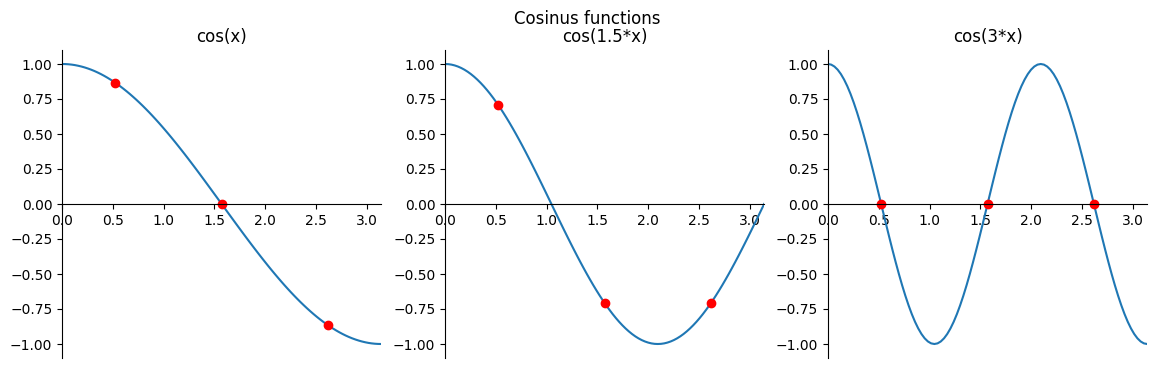

In [111]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
init_printing()

c_range = np.linspace(0, np.pi, 100)

x = sp.symbols('x')
expr_cf1 = sp.cos(x)
expr_cf2 = sp.cos(1.5 * x)
expr_cf3 = sp.cos(3 * x)

def cf1(x):
    return np.round(np.cos(x), 4)

def cf2(x):
    return np.round(np.cos(1.5*x), 4)

def cf3(x):
    return np.round(np.cos(3*x), 4)

parts = np.array([np.pi/6, np.pi/2, 5*np.pi/6])
print(parts)

cf1_values = [cf1(np.pi/6), cf1(np.pi/2), cf1(5*np.pi/6)]
print(cf1_values)
cf2_values = [cf2(np.pi/6), cf2(np.pi/2), cf2(5*np.pi/6)]
print(cf2_values)
cf3_values = [cf3(np.pi/6), cf3(np.pi/2), cf3(5*np.pi/6)]
print(cf3_values)

c_range = np.linspace(0, np.pi, 100)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(14, 4))

ax0.set_title(expr_cf1)
ax0.spines['top'].set_color('none')
ax0.spines['left'].set_position('zero')
ax0.spines['right'].set_color('none')
ax0.spines['bottom'].set_position('zero')
ax0.plot(c_range, cf1(c_range))
ax0.plot(parts, cf1(parts), 'o', color='red')

ax1.set_title(expr_cf2)
ax1.spines['top'].set_color('none')
ax1.spines['left'].set_position('zero')
ax1.spines['right'].set_color('none')
ax1.spines['bottom'].set_position('zero')
ax1.plot(c_range, cf2(c_range))
ax1.plot(parts, cf2(parts), 'o', color='red')

ax2.set_title(expr_cf3)
ax2.spines['top'].set_color('none')
ax2.spines['left'].set_position('zero')
ax2.spines['right'].set_color('none')
ax2.spines['bottom'].set_position('zero')
ax2.plot(c_range, cf3(c_range))
ax2.plot(parts, cf3(parts), 'o', color='red')

fig.suptitle("Cosinus functions")
plt.xlim(0, np.pi)
plt.show()


Jede Kosinusfunktion liefert so 3 Werte, die als Vektor interpretiert werden können, deren Werte verschiedene Graustrufen zugeordnet sind.

Nun kann eine beliebige kombination von Grau-Werten über die linearkombination der zuvor definierten Kosinusfunktionen dargestellt werden. 


## Praxisteil



In [140]:
from scipy.fftpack import dct
from PIL import Image


def save_image_from_array(aimg, path='myimage.jpg'):
    img = Image.fromarray(aimg, 'L')
    img.save(path)
    print("Saved image: {}".format(path))


img = Image.open('tiger.png').convert('L')
img_arr = np.array(img.getdata(), dtype=np.uint8)
1
print(img_arr)

dct_img = dct(img_arr, 1)

save_image_from_array(dct_img)






[0 0 0 ... 0 0 0]
Saved image: myimage.jpg


## Schlussfolgerungen


## Quellenverzeichnis
[Burger. 2015. *Digitale Bildverarbeitung: eine algorithmische Einführung mit Java*](zotero://select/items/_9EUHGKD9)


